# Introduction :

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

# Feature Description:

1. ph: pH of 1. water (0 to 14).

2. Hardness: Capacity of water to precipitate soap in mg/L.

3. Solids: Total dissolved solids in ppm.

4. Chloramines: Amount of Chloramines in ppm.

5. Sulfate: Amount of Sulfates dissolved in mg/L.

6. Conductivity: Electrical conductivity of water in μS/cm.

7. Organic_carbon: Amount of organic carbon in ppm.

8. Trihalomethanes: Amount of Trihalomethanes in μg/L.

9. Turbidity: Measure of light emiting property of water in NTU.

10. Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

### Importing data set

In [2]:
data =pd.read_csv("water_potability.csv")
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

### Reading Data set

In [3]:
data.shape

(3276, 10)

In [4]:
data.size

32760

In [5]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
data.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [8]:
data.duplicated().sum()

0

### Cleaning Data set

In [9]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
data["ph"].fillna(data["ph"].mean(),inplace=True)

In [11]:
data["Sulfate"].fillna(data["Sulfate"].mean(),inplace=True)

In [12]:
data["Trihalomethanes"].fillna(data["Trihalomethanes"].mean(),inplace=True)

In [13]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Analysing & Visualizing Data set

In [14]:
data["Potability"].replace({0:"Not Potable", 1:"Potable"},inplace=True)

In [32]:
data.describe().T

count          mean          std         min           25%  \
ph               3276.0      7.080795     1.469956    0.000000      6.277673   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          3276.0    333.775777    36.142612  129.000000    317.094638   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3276.0     66.396293    15.769881    0.738000     56.647656   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   

                          50%           75%           max  
ph                   7.080795      7.870050     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.775777    350.385756    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.396293     76.666609    124.000000  
Turbidity            3.955028      4.500320      6.739000

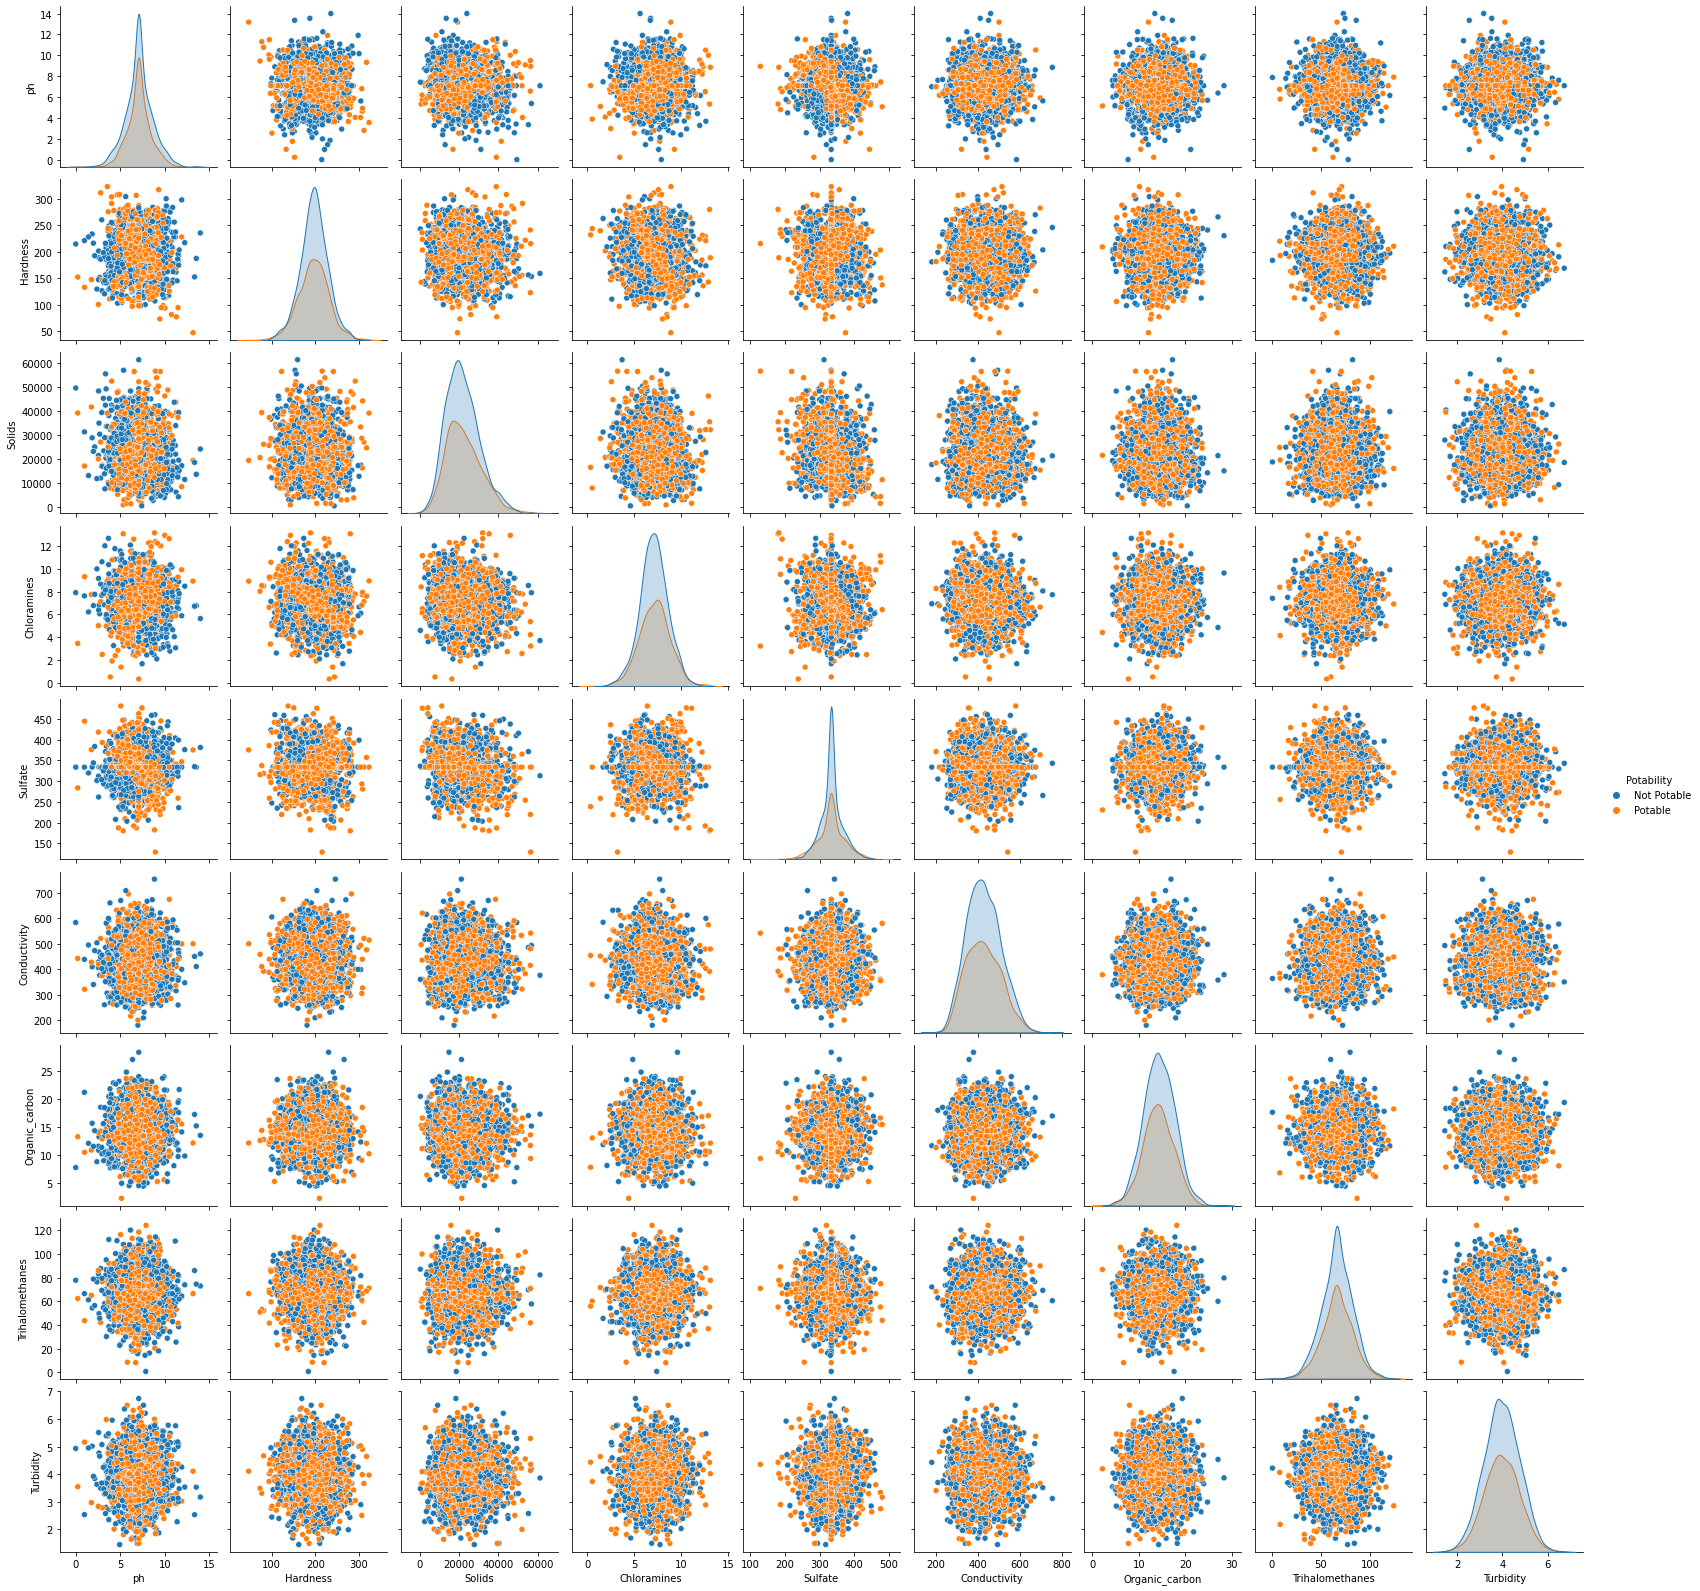

In [46]:
sns.pairplot(data, hue="Potability")
plt.show()

#### Potability
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.



In [15]:
fig=px.pie(data,"Potability",title="Water Potability",hole=0.4)
fig.add_annotation(text='Potability',x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')
fig.update_traces(marker=dict(colors=['darkorange','blue'], line=dict(color='#000000', width=2)))
fig

#### PH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

In [16]:
px.violin(data, y ="ph",x = "Potability", color="Potability",box=True,points="all", title= "ph level of distribution",template="plotly_dark")

#### Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

In [17]:
px.violin(data, x ="Potability", y ="Hardness",points="all",color="Potability",template="plotly_dark",title="Hardness Distribution",box=True)

#### Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

In [19]:
px.violin(data, x ="Potability", y = "Solids", color="Potability", points="all", box=True, template="plotly_dark", title="Distribution of Total Dissolved Solids")

#### Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

In [21]:
px.violin(data, x ="Potability", y = "Chloramines", color="Potability", points="all", box=True, template="plotly_dark", title="Chloramines Distribution")

#### Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

In [22]:
px.violin(data, x ="Potability", y = "Sulfate", color="Potability", points="all", box=True, template="plotly_dark", title="Sulfate Distribution")

#### Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

In [23]:
px.violin(data, x ="Potability", y = "Conductivity", color="Potability", points="all", box=True, template="plotly_dark", title="Conductivity Distribution")

#### Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

In [24]:
px.violin(data, x ="Potability", y = "Organic_carbon", color="Potability", points="all", box=True, template="plotly_dark", title="Organic carbon Distribution")

#### Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

In [25]:
px.violin(data, x ="Potability", y = "Trihalomethanes", color="Potability", points="all", box=True, template="plotly_dark", title="Trihalomethanes Distribution")

#### Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

In [26]:
px.violin(data, x ="Potability", y = "Turbidity", color="Potability", points="all", box=True, template="plotly_dark", title="Turbidity Distribution")

In [27]:
cor =data.drop("Potability",axis=1).corr()

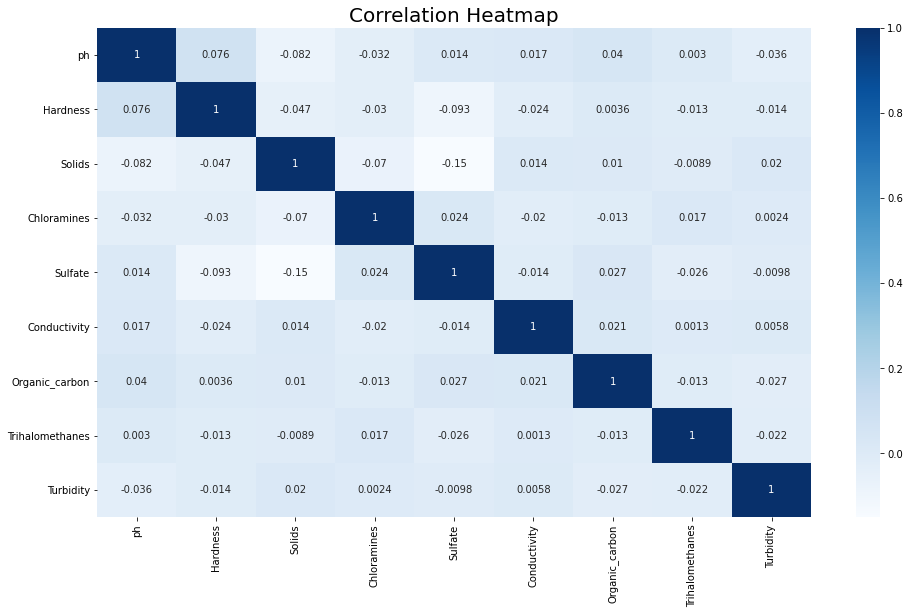

In [43]:
plt.figure(figsize=(16,9))
sns.heatmap(cor,annot=True,cmap="Blues")
plt.title("Correlation Heatmap", fontsize =20)
plt.show()

## Thank You